<a href="https://colab.research.google.com/github/vineeth1408/ML-Basic-Datasets/blob/main/task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
df=pd.read_csv('task.csv')

In [ ]:
df

,Issue ID,Title,Description,Issue Status,Resolution
0,2142,ER-Classification quality improvement,"Hi,\nfind attached one example of possible cle...",Active,​Moved to DATA Streaming
1,2182,ER-STEP Type Dataset,Hi\nIs it possible to add a „new“ dataset type...,Active,NaN
2,2229,ER-BOM REPORT ISSUES,"Hi Omar,\nI just discussed this with hiresh. B...",Active,NaN
3,2497,ER-VS: Vekt fra TC til SAP,"Hi,\nFind attached list of wheigths. How can w...",Active,NaN
4,2508,ER-VS: Vekt fra TC til SAP,Data Stream,Active,NaN
...,...,...,...,...,...
2893,1326,DC0201996 error,Error during approval. Please check and comple...,Resolved,​1
2894,1334,DC0202059 error,One more similar error. Please check and compl...,Resolved,​1
2895,1344,Type of error when saving BOM in tc,"When saving BOM in TC, I get this message:\nDo...",Resolved,​1
2896,1346,URGENT!! CAD files of standard parts,Can you please create CAD parts off the follow...,Resolved,1


# Data preprocessing 

In [ ]:
df['Title']

0          ER-Classification quality improvement
1                           ER-STEP Type Dataset
2                           ER-BOM REPORT ISSUES
3                     ER-VS: Vekt fra TC til SAP
4                     ER-VS: Vekt fra TC til SAP
                          ...                   
2893                             DC0201996 error
2894                             DC0202059 error
2895         Type of error when saving BOM in tc
2896        URGENT!! CAD files of standard parts
2897    Search on Legacy Items gives noe results
Name: Title, Length: 2898, dtype: object

**Counting Titles**

In [ ]:
df['Title'].value_counts()

Release item                                                        27
Release material                                                    20
Rename to CXSS                                                      17
High                                                                14
Renaming                                                            14
                                                                    ..
urgent change                                                        1
New std parts                                                        1
ER-Replaced By Class Suffix workflow for Super Users                 1
Can not releas DC0201524                                             1
XSC1111006997 and CXSS00443856 changed by miguser. Not released?     1
Name: Title, Length: 2565, dtype: int64

**Counting words**

In [ ]:
df['word_counts']= df['Title'].apply(lambda x:len(str(x).split())) #split into words and count each word

In [ ]:
df.head(3)

,Issue ID,Title,Description,Issue Status,Resolution,word_counts
0,2142,ER-Classification quality improvement,"Hi,\nfind attached one example of possible cle...",Active,​Moved to DATA Streaming,3
1,2182,ER-STEP Type Dataset,Hi\nIs it possible to add a „new“ dataset type...,Active,NaN,3
2,2229,ER-BOM REPORT ISSUES,"Hi Omar,\nI just discussed this with hiresh. B...",Active,NaN,3


In [ ]:
print(df['word_counts'].max())
df['word_counts'].min()

25


1

In [ ]:
def char_counts(x): # removing spaces
    s=x.split()
    x=''.join(s)
    return len(x)

In [ ]:
df['char_counts']=df['Title'].apply(lambda x: char_counts(str(x)))

In [ ]:
df['avg_word_len'] = df['char_counts']/df['word_counts']

 stop words

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

stop words len

In [ ]:
df['stop_words_len']=df['Title'].apply(lambda x: len([t for t in x.split() if t in stopwords]))

Numeric digits present in titles

In [ ]:
df['numeric_count']=df['Title'].apply(lambda x:len([t for t in x.split() if t.isdigit()]))

In [ ]:
df.sample(3)

,Issue ID,Title,Description,Issue Status,Resolution,word_counts,char_counts,avg_word_len,stop_words_len,numeric_count
1860,1967,New items. Need 3D model and change of material.,Can you please make 3D model of the following ...,Closed,​We have created all 3D model through part fam...,9,40,4.444444,2,0
474,497,Error in release of material,"I released D1111308714 yesterday, to plant 018...",Closed,​\nI cannot see the release flag on the revisi...,5,24,4.800000,2,0
701,769,Create CXSS,Can you please create an CXSS out of the follo...,Closed,​We have created the CXSSs and released them w...,2,10,5.000000,0,0


dropping unnecessary columns

In [ ]:
df=df.drop(columns=['Description','Issue Status','Resolution'],axis=1)

#upper case count

In [ ]:
df['upper_words_count']=df['Title'].apply(lambda x:len([t for t in x.split() if t.isupper()]) )

Convert to small letters

In [ ]:
df['Title'] = df['Title'].apply(lambda x:str(x).lower())

In [ ]:
df.sample(2)

,Issue ID,Title,word_counts,char_counts,avg_word_len,stop_words_len,numeric_count,upper_words_count
660,725,dc0200994,1,9,9.000000,0,0,0
1641,1747,fw: dn700 gasket,3,14,4.666667,0,0,0


Removing punctuations and 

In [ ]:
import re
df['Title']=df['Title'].apply(lambda x: re.sub(r'[^\w]+', " ", x).strip()) # replacing with ' '

In [ ]:
df.sample(5)

,Issue ID,Title,word_counts,char_counts,avg_word_len,stop_words_len,numeric_count,upper_words_count
2459,2578,help to make cxss,4,14,3.500000,2,0,0
2207,2318,not able to make bom report,6,22,3.666667,2,0,0
2366,2477,error on pnas report where used,6,26,4.333333,2,0,0
2374,2485,re create cad part of c1111041429,6,29,4.833333,2,0,0
1700,1807,fw delete item revision,4,21,5.250000,0,0,0


In [ ]:
df

,Issue ID,Title,word_counts,char_counts,avg_word_len,stop_words_len,numeric_count,upper_words_count
0,2142,er classification quality improvement,3,35,11.666667,0,0,0
1,2182,er step type dataset,3,18,6.000000,0,0,0
2,2229,er bom report issues,3,18,6.000000,0,0,0
3,2497,er vs vekt fra tc til sap,6,21,3.500000,0,0,0
4,2508,er vs vekt fra tc til sap,6,21,3.500000,0,0,0
...,...,...,...,...,...,...,...,...
2893,1326,dc0201996 error,2,14,7.000000,0,0,0
2894,1334,dc0202059 error,2,14,7.000000,0,0,0
2895,1344,type of error when saving bom in tc,8,28,3.500000,3,0,0
2896,1346,urgent cad files of standard parts,6,31,5.166667,1,0,0


removing multiple spaces

In [ ]:
df['Title']=df['Title'].apply(lambda x: ' '.join(x.split()))

remove accenterd chars

In [ ]:
import unicodedata
def remove_accented_chars(x):
    x=unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
    return x

In [ ]:
df['Title']=df['Title'].apply(lambda x: remove_accented_chars(x))

word cloud visualization of titles


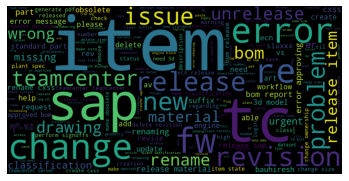

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
% matplotlib inline

text = ' '.join(df['Title'])

wc= WordCloud(width=1000, height=500).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

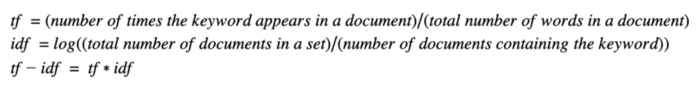

The tf–idf value increases proportionally to the number of times a word appears in the document

In information retrieval, tf–idf, TF*IDF, or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection

**Term Frequency — TF**

The term frequency tf(t, d) measures how frequently a term t occurs in a document d, giving a highers weight to more frequent terms.

**tf(t,d)=log(1+ freq(t,d))**

**Inverse Document Frequency — IDF**

The inverse document frequency idf(t, D) measures the importance of a term t in a set of documents D. This statistic lowers the importance of frequent terms with low importance and increases the weight of rare terms that give more meaning to a text.

**idf(t,D)=log(N/ count(d belongs to D , t belongs to d))**

**The product of tf(t, d) by idf(t, D) yields the tf-idf score for each term.**


In [ ]:
document=df['Title']
vectorizer =TfidfVectorizer(stop_words='english') # to remoce stop words
features = vectorizer.fit_transform(document) # Tf-idf-weighted document-term matrix.term frequency and inverse document frequency
print(vectorizer.get_feature_names())

['00', '0003', '004333', '01', '014', '0180', '0181', '0182', '02', '03', '04', '046117', '069', '09', '09_36_03', '10', '100', '10010', '108', '1080', '10x1', '11', '110', '11024', '1110', '111324086', '111324586', '111325086', '111339986', '111366786', '111372786', '111387186', '111410786', '111438786', '111445786', '111455486', '111455586', '111465086', '111485586', '111570786', '11161', '111663586', '113399', '12', '12400', '12408', '12410', '12412', '127009', '13287', '13288', '14008', '14016', '14016_c1111011758_bom_report_15_06_2018_10_31_46', '14519', '14544', '14tegn', '150', '155', '161017_hrs', '16419', '16428', '16430', '16430_c1111008173_bom_report_18_02_2019_13_02_45', '17', '17047', '17294', '17297', '17318', '17320', '17326', '17327', '17333', '17345', '17346', '177', '18', '180', '181', '19', '19502', '20', '200028622', '200030783', '200031838', '200041391', '2011', '2017', '2018', '2019', '204828', '21', '218_23', '21crmov5', '22', '22006', '22011', '22016', '22017', 

In [ ]:
print(features) # if-idf-weighted document-term matrix

  (0, 1861)	0.5948682672808763
  (0, 2354)	0.6255024268654853
  (0, 785)	0.3378971462521399
  (0, 1606)	0.3751052880489639
  (1, 1151)	0.5092272387425356
  (1, 2737)	0.5092272387425356
  (1, 2612)	0.5706785882385176
  (1, 1606)	0.39458989795913135
  (2, 1903)	0.5877367239860941
  (2, 2423)	0.5037114662597372
  (2, 373)	0.3932685117295202
  (2, 1606)	0.4961654761454162
  (3, 2487)	0.2530919412733506
  (3, 2708)	0.39259807164086086
  (3, 2668)	0.24986262284088548
  (3, 1733)	0.45571035486231626
  (3, 2800)	0.5296080139797659
  (3, 2819)	0.3459738397843808
  (3, 1606)	0.33395421736812864
  (4, 2487)	0.2530919412733506
  (4, 2708)	0.39259807164086086
  (4, 2668)	0.24986262284088548
  (4, 1733)	0.45571035486231626
  (4, 2800)	0.5296080139797659
  (4, 2819)	0.3459738397843808
  :	:
  (2891, 1713)	0.5428268239683037
  (2891, 235)	0.48244129036395456
  (2891, 2668)	0.30232965096576075
  (2892, 1324)	0.911744090183871
  (2892, 1611)	0.4107587053426688
  (2893, 1325)	0.911744090183871
  (2893, 1

K -Means applied

In [ ]:
k=20
model = KMeans(n_clusters=k)
model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
df['cluster']=model.labels_

In [ ]:
df.head(5)

,Issue ID,Title,word_counts,char_counts,avg_word_len,stop_words_len,numeric_count,upper_words_count,cluster
0,2142,er classification quality improvement,3,35,11.666667,0,0,0,8
1,2182,er step type dataset,3,18,6.000000,0,0,0,0
2,2229,er bom report issues,3,18,6.000000,0,0,0,0
3,2497,er vs vekt fra tc til sap,6,21,3.500000,0,0,0,12
4,2508,er vs vekt fra tc til sap,6,21,3.500000,0,0,0,12


In [ ]:
clusters = df.groupby('cluster')

for cluster in clusters.groups:
    f=open('cluster' +str(cluster)+ '.csv','w') #to create a csv file
    data=clusters.get_group(cluster)[['Issue ID','Title']]
    f.write(data.to_csv(index_label='id'))
    f.close()

ELBOW METHOD

In [ ]:
k_rng=range(1,10)
sse=[] #sum of square error
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df['Title']) # if we call this will get sum of squares error
    sse.append(km.inertia_) #appending sum of squares error for integers

ValueError: ignored

In [ ]:
df

,Issue ID,Title,Description,Issue Status,Resolution
0,2142,er classification quality improvement,"Hi,\nfind attached one example of possible cle...",Active,​Moved to DATA Streaming
1,2182,er step type dataset,Hi\nIs it possible to add a „new“ dataset type...,Active,NaN
2,2229,er bom report issues,"Hi Omar,\nI just discussed this with hiresh. B...",Active,NaN
3,2497,er vs vekt fra tc til sap,"Hi,\nFind attached list of wheigths. How can w...",Active,NaN
4,2508,er vs vekt fra tc til sap,Data Stream,Active,NaN
...,...,...,...,...,...
2893,1326,dc0201996 error,Error during approval. Please check and comple...,Resolved,​1
2894,1334,dc0202059 error,One more similar error. Please check and compl...,Resolved,​1
2895,1344,type of error when saving bom in tc,"When saving BOM in TC, I get this message:\nDo...",Resolved,​1
2896,1346,urgent cad files of standard parts,Can you please create CAD parts off the follow...,Resolved,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


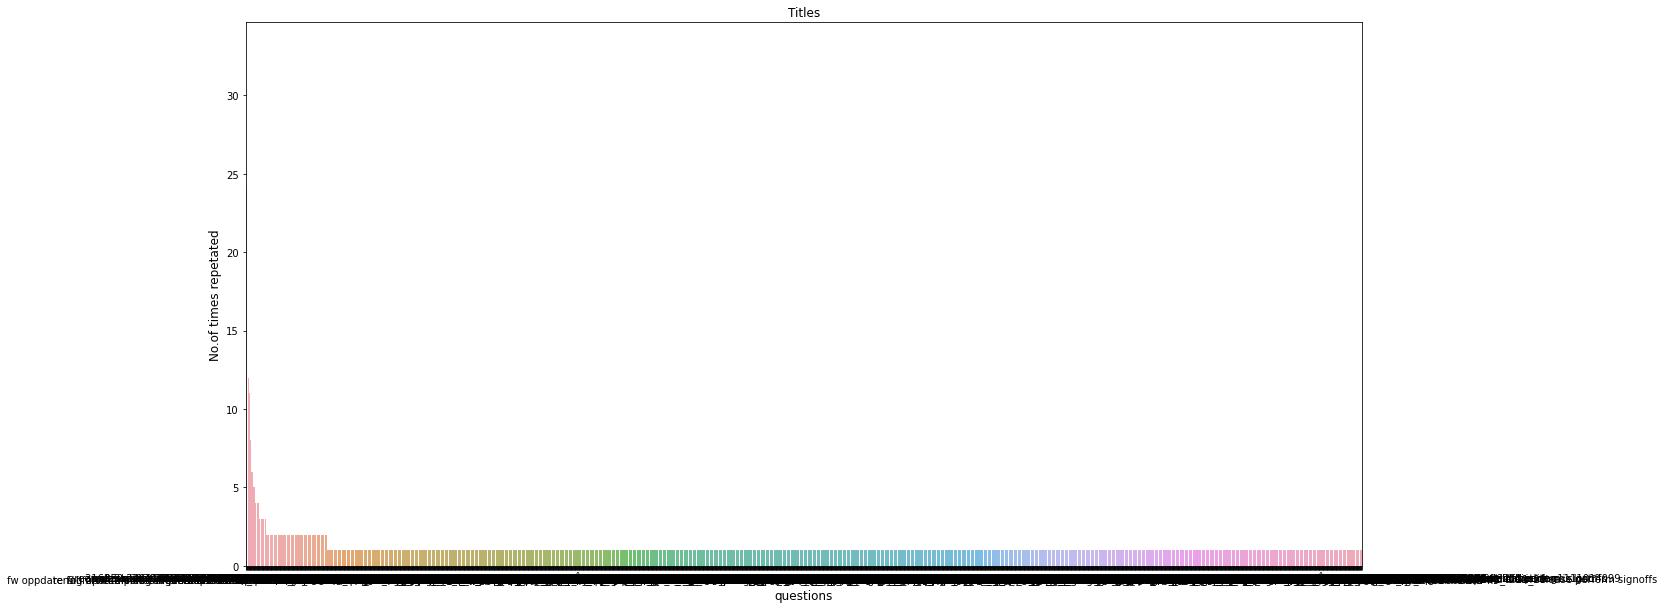

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
count=df['Title'].value_counts()
plt.figure(figsize=(20,10))
sns.barplot( count.index, count.values, alpha=0.8)
plt.title('Titles')
plt.ylabel('No.of times repetated', fontsize=12)
plt.xlabel('questions',fontsize=12)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


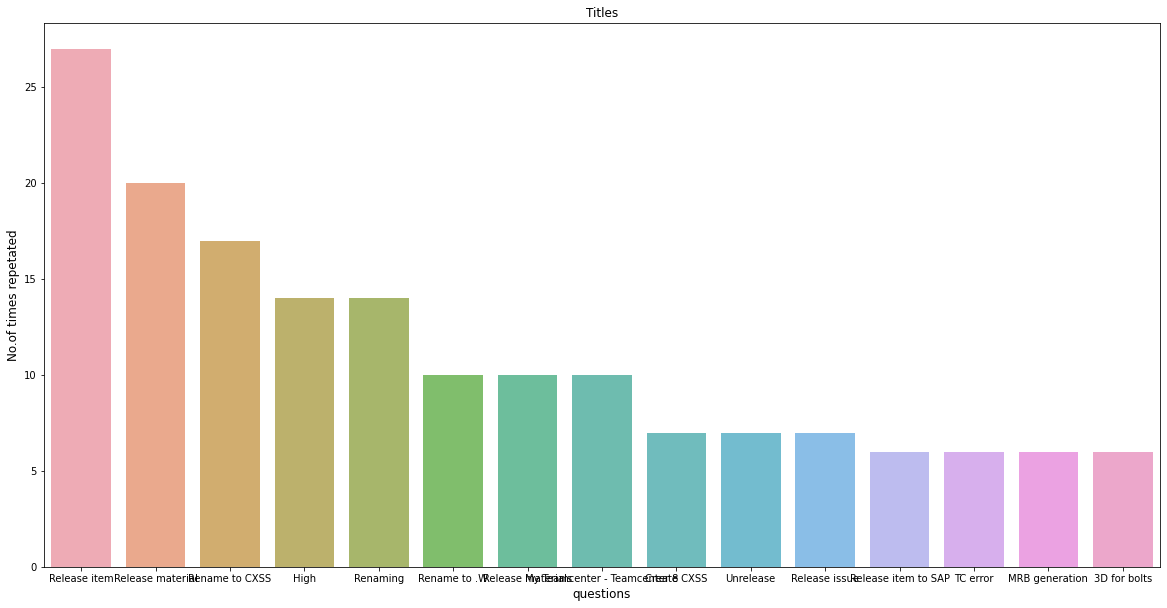

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
count=df['Title'].value_counts()
count=count[:15]
plt.figure(figsize=(20,10))
sns.barplot( count.index, count.values, alpha=0.8)
plt.title('Titles')
plt.ylabel('No.of times repetated', fontsize=12)
plt.xlabel('questions',fontsize=12)
plt.savefig('1.png')
plt.show()

In [ ]:
df['Title'].value_counts()

Release item                                                                                       27
Release material                                                                                   20
Rename to CXSS                                                                                     17
High                                                                                               14
Renaming                                                                                           14
                                                                                                   ..
ECM from Bacelona                                                                                   1
cardinality error                                                                                   1
DC0201370                                                                                           1
Structure Manager - Teamcenter 8; Ikke mulig å endre Find nr. i anlegg spes i nivå